# Analyzing the risk of becoming diabetic using Data Science

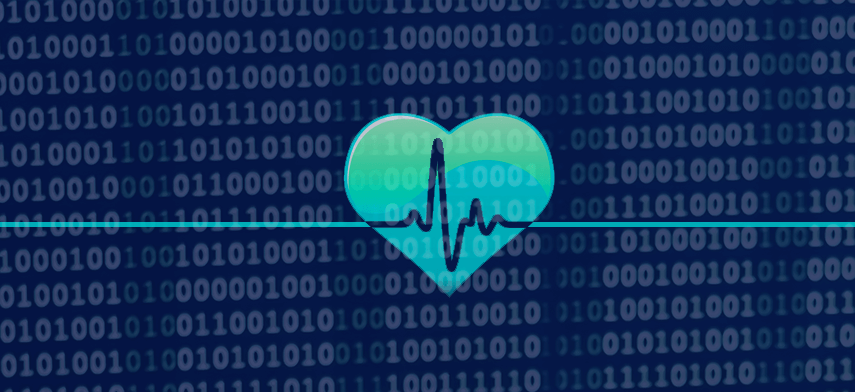

## Introduction

In this project, we will aim to predict whether a patient has diabetes or not, using various metabolic information of the patient. Data used for this project is taken from Kaggle. Link - https://www.kaggle.com/uciml/pima-indians-diabetes-database

We will analyze the data using CRISP-DM.
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding 

Do you know which is the World's most complicated machine- it is the human body. With numerous subsystems like Nervous system, Cardiac system etc, we generate tonnes of data. [Reports](https://intellipaat.com/blog/data-science-applications-in-healthcare/#1) suggest that a human body on an average generates 2 TeraBytes of data everyday. Can we use such information to predict if we are susceptible to diseases? 

Data Science applications in healthcare are growing day by day. With medical data generated at an astronomical scale, it is becoming easier to explain the diseases using other correlating metabolic state. For example, the level of obesity are being mapped directly to heart diseases- [ref](https://www.sciencedirect.com/science/article/pii/S2666518221000401).

In this project, we aim to explain/predict if a patient is diabetic, given his metabolic data.

Most diagnosis for diabetes involves testing blood samples. Thus, if we can explain if a patient be susceptible to diabetes using a patient's general metabolic data, it will create a huge impact in the health care industry, since we can preemtively take measures to control diabetes. If we are able to develop a product with a good evaluation measure, this can yield huge revenues.

We have few question in our mind that we are curious about-
1. Do people with high Glucose level are more vulnerable to diabetes?
2. There is a general notion that overweight people are at high risk of diabetes. Is it true?
3. Are elder people more prone to diabetes?
4. Is diabetes generally hereditary?
5. Does the number of pregnancies experienced increase the risk of getting diabetes?

We will be answering the questions after we analyse the data using CRISP-DM.

## Data Undestanding and Preparation

### Loading the data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
#Reading the data and looking at the top 5 rows
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding the quality and quantity of the data

In [3]:
df.shape

(768, 9)

We see that there 768 rows and 9 columns. 

Let us take a closer look at the columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We have 7 columns that can be potentially be the features of our model and all these are numerical features.

Now let us see what each column explains
1. Pregnancies- Number of times the patient was pregnant
2. Glucose- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure- Diastolic blood pressure (mm Hg)
4. SkinThickness - Triceps skin fold thickness (mm)
5. Insulin- 2-Hour serum insulin (mu U/ml)
6. BMI- Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction- A function which scores the likelihood of diabetes based on family history
8. Age- Age of the patient
9. Status- Whether the patient is diabetic or not

In [5]:
df['Outcome'] = df['Outcome'].astype('int')

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The data is imbalances with majority class being 0

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


At first look the data seems not to have any null values, since the count values tally. But if you take a closer look at columns like Glucose, BloodPressure, SkinThickness, Insulin and BMI it has zero values, which is not possible. So we have consider them as NaN values.

In [8]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[col] = df[col].replace(0,np.NaN)

Now let us the see number of null values

In [9]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

So these null values have to be imputed. Note we can also drop the Insulin column since it has nearly 50% of the records as null. But a google search will tell you that Insulin levels are good indicators of diabetes. So let us trust the domain knowledge and proceed forward without removing the column.

### Imputing missing values

Before imputing the missing values, we need to see the distribution of the values

<Figure size 1080x1080 with 0 Axes>

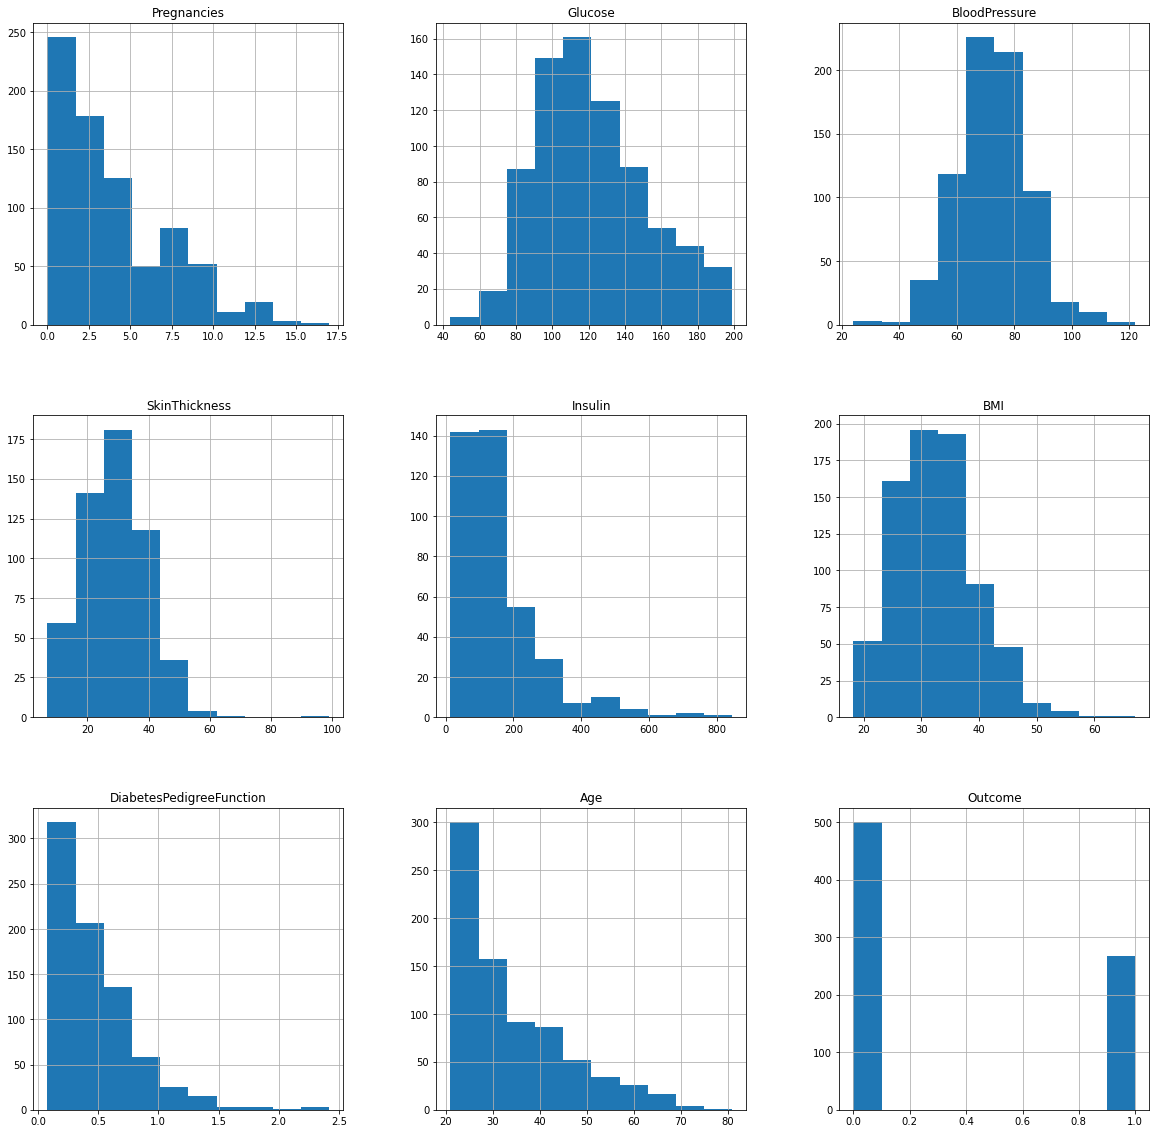

In [10]:
plt.figure(figsize = (15,15))
fig = df.hist(figsize = (20,20))

For skewed distributions, it is better to impute with mean while for close to normal distributions it is better to impute with median. Reference- [here](https://medium.com/analytics-vidhya/feature-engineering-part-1-mean-median-imputation-761043b95379#:~:text=for%20numerical%20variables.-,2.,the%20values%20in%20the%20variable.)

In [11]:
for col in  ['Glucose', 'BloodPressure']:
    df[col] = df[col].fillna(df[col].mean())
    
for col in  ['SkinThickness','Insulin','BMI']:
    df[col] = df[col].fillna(df[col].mean())

### Exploratory data analysis

**Pair Plot**

<Figure size 1080x1080 with 0 Axes>

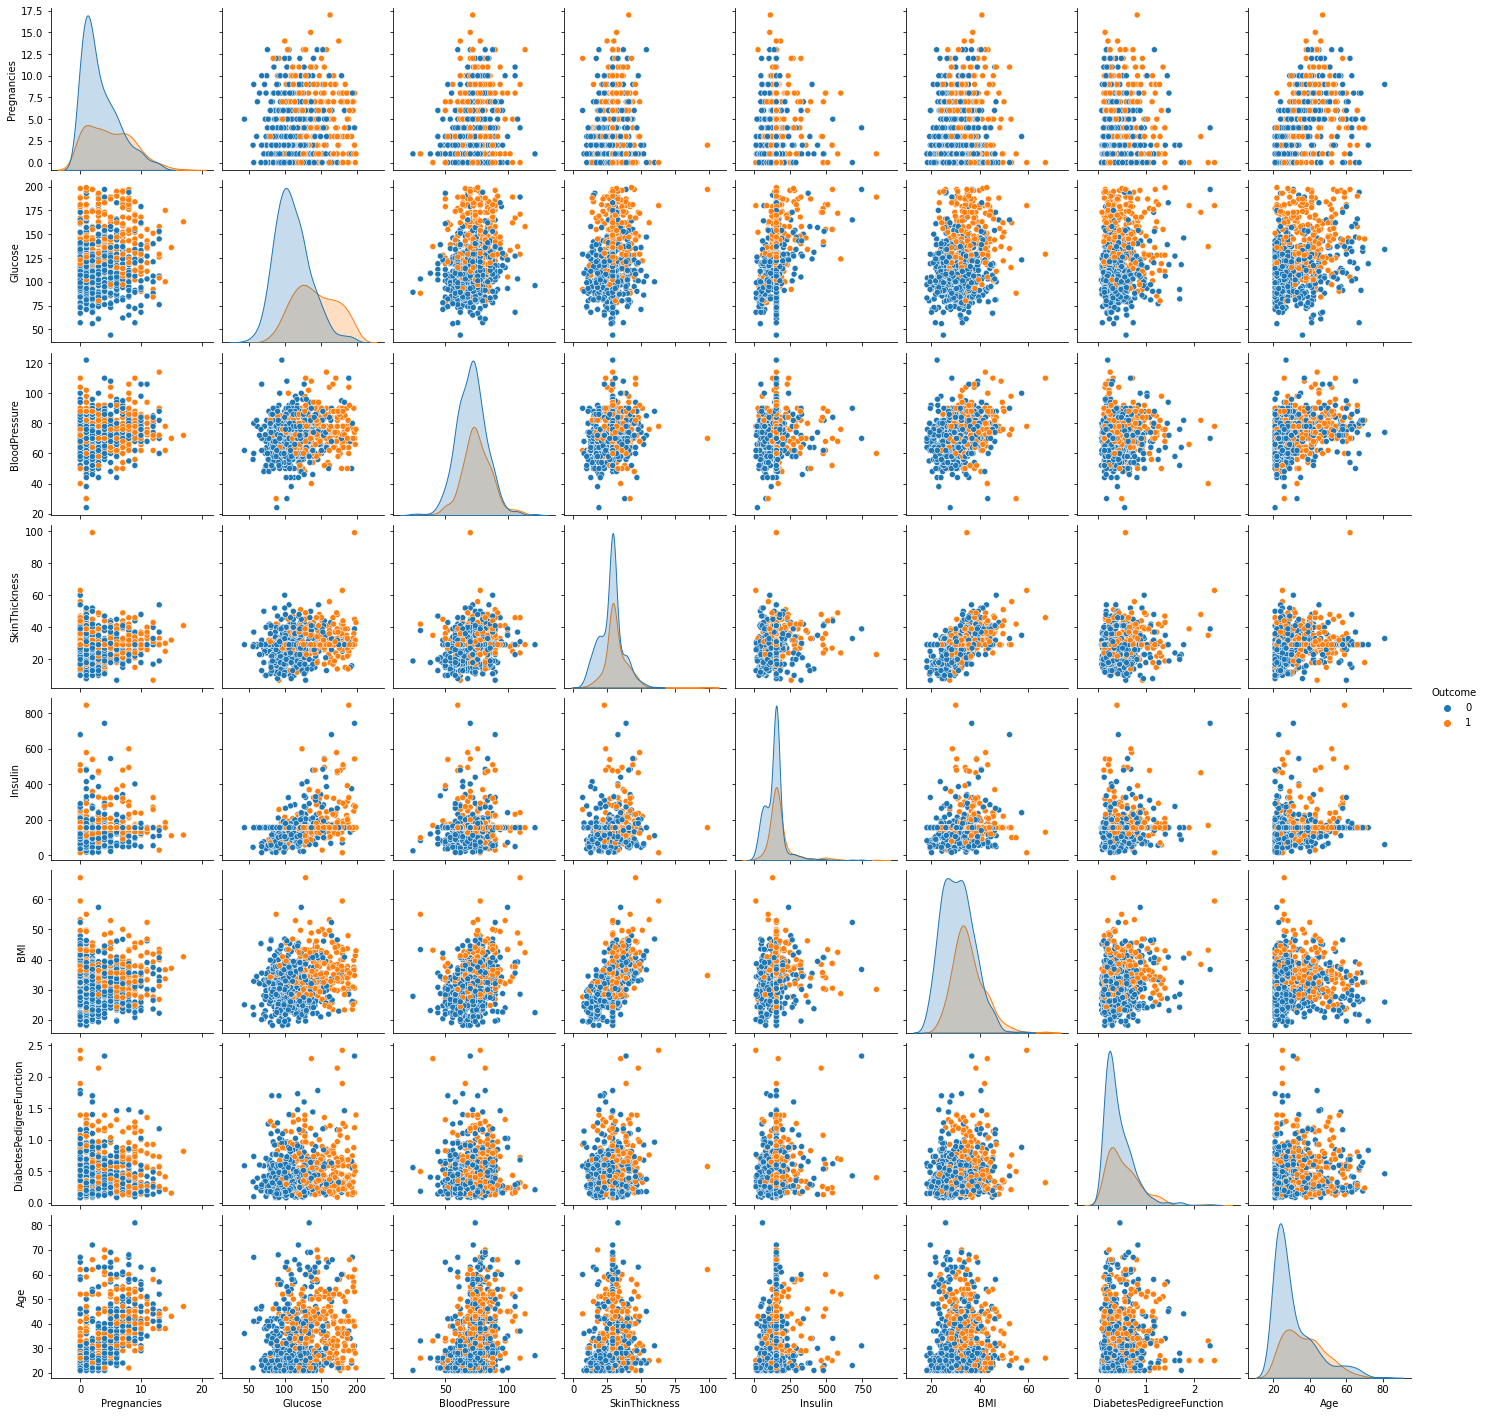

In [12]:
plt.figure(figsize = (15,15))
fig =sns.pairplot(df, hue = 'Outcome')

Clearly, few features like Glucose, BMI explains the diabetes strongly irrespective of any combination while other features still show some effect.
We will also explore features separately on how it affects the diabetes.

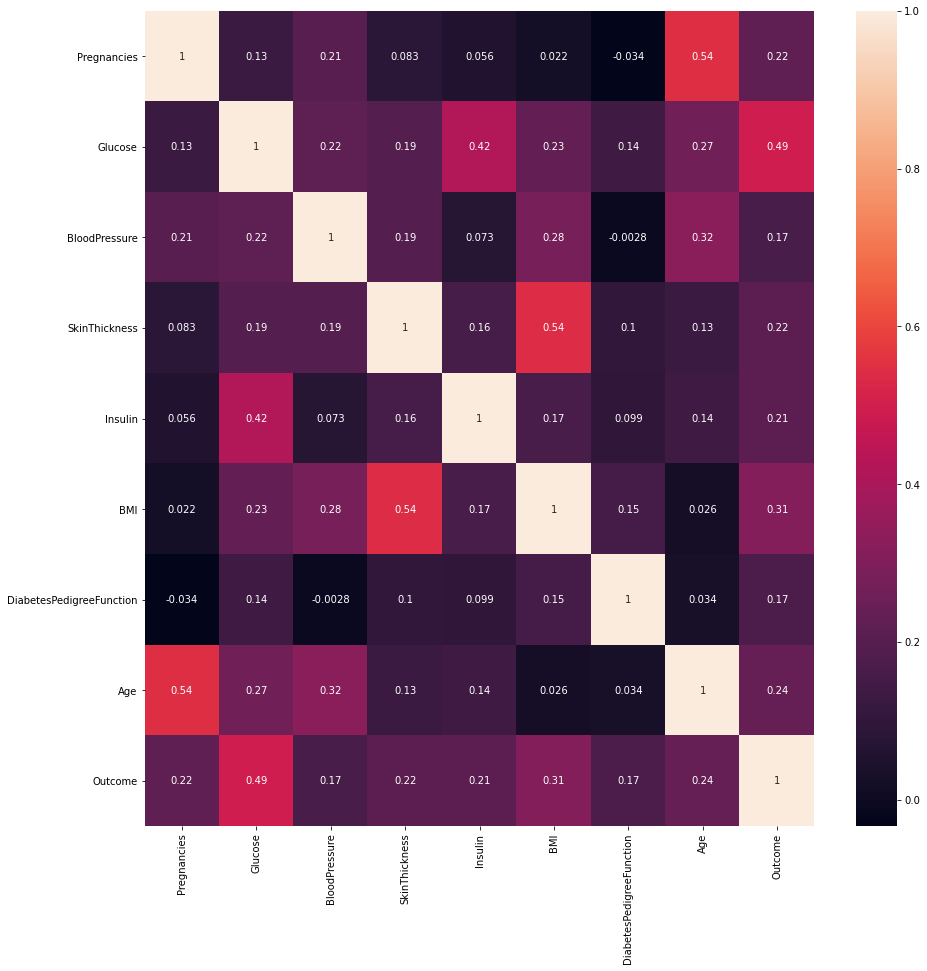

In [13]:
plt.figure(figsize = (15,15))
fig =sns.heatmap(df.corr(), annot=True)

Just like we observed in the pair plot, Glucose and BMI shows the maximum correlation with diabetes outcome(though the outcome is a categorical variable, since 1 represents the positivity of diabetes, these correlations are still valid).

Now let us explore each columns individually

**Pregnancies**

First let us the distribution of number of pregnancies 

In [14]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

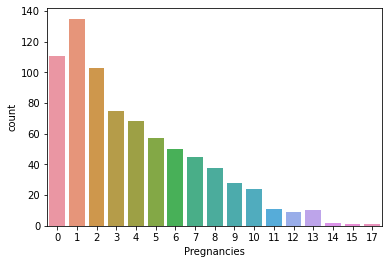

In [15]:
pregnancy_count = df['Pregnancies'].value_counts().reset_index()
pregnancy_count.columns = ['Pregnancies', 'count']
sns.barplot(x='Pregnancies',y='count',data=pregnancy_count)

Text(0.5, 0, 'Number of Pregnancies')

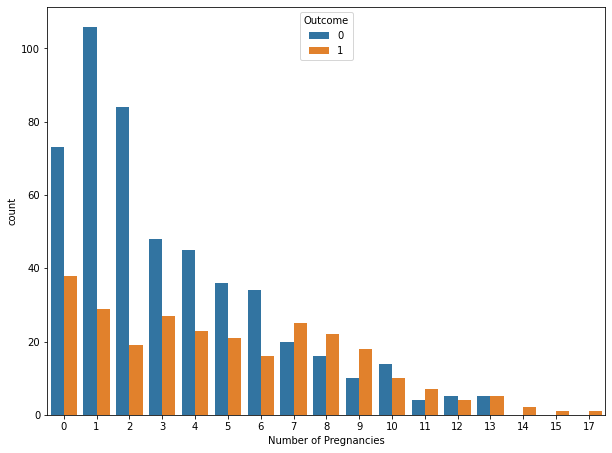

In [16]:
df['count'] = [1]*len(df)
pregnancy_count = df.groupby(['Pregnancies','Outcome'])['count'].agg('count').reset_index()
df = df.drop('count', axis = 1)
plt.figure(figsize = (10,7.5))
sns.barplot(x='Pregnancies',y='count',hue = 'Outcome', data=pregnancy_count)
plt.xlabel('Number of Pregnancies')


The data clearly suggest that as the number of pregnancies increase, more is the risk for diabetes

**Glucose**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

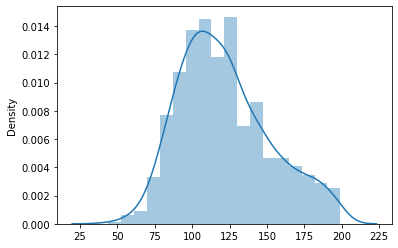

In [17]:
sns.distplot(df['Glucose'].values)

In [18]:
df.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,110.710121,24.71706,44.0,93.0,107.5,125.0,197.0
1,268.0,142.165573,29.54175,78.0,119.0,140.0,167.0,199.0


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

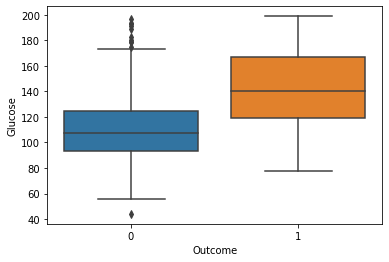

In [19]:
sns.boxplot(x='Outcome', y ='Glucose', data=df)

The box plot suggests that patients with higher glucose levels tend to have more risk of diabetes.

**BloodPressure**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

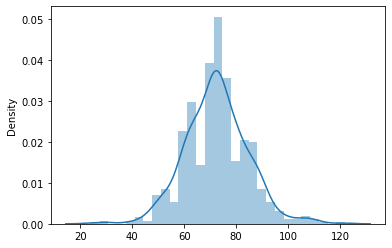

In [20]:
sns.distplot(df['BloodPressure'].values)

In [21]:
df.groupby('Outcome')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,70.935397,11.931033,24.0,63.5,72.0,78.0,122.0
1,268.0,75.147324,11.945712,30.0,68.0,74.0,82.0,114.0


<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

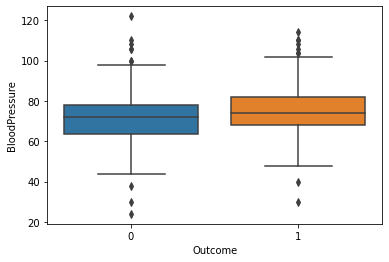

In [22]:
sns.boxplot(x='Outcome', y ='BloodPressure', data=df)

There is strong effect of BloodPressure affecting the risk of diabetes though the values of patients with diabetes have slightly higher blood pressure.

**SkinThickness**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

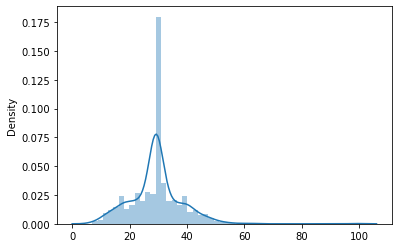

In [23]:
sns.distplot(df['SkinThickness'].values)

In [24]:
df.groupby('Outcome')['SkinThickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,27.768651,8.559606,7.0,22.00000,29.15342,31.0,60.0
1,268.0,31.736944,8.647599,7.0,29.15342,29.15342,36.0,99.0


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

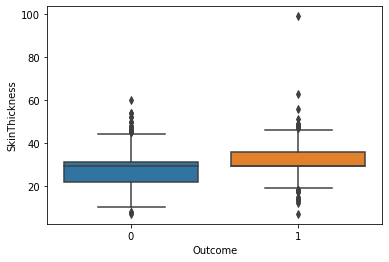

In [25]:
sns.boxplot(x='Outcome', y ='SkinThickness', data=df)

From the data, we see that patients with diabetes tends to have higher skin thickness

**Insulin**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

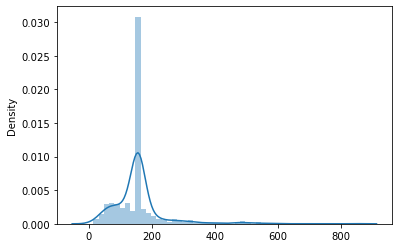

In [26]:
sns.distplot(df['Insulin'].values)

In [27]:
df.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,142.210761,75.463785,15.0,95.000000,155.548223,155.548223,744.0
1,268.0,180.431548,95.747538,14.0,155.548223,155.548223,167.250000,846.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

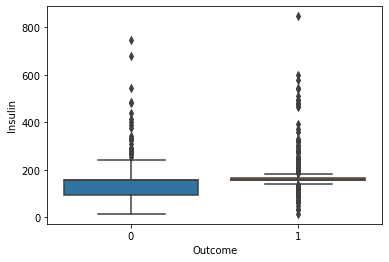

In [28]:
sns.boxplot(x='Outcome', y ='Insulin', data=df)

The distibution is very scattered for insulin. So we can't clearly explain how the Insulin value affects the diabetes.
Though, the values of mean and other quartiles suggest that people with diabetes have higher Insulin levels.

**BMI**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

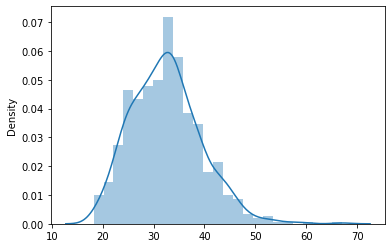

In [29]:
sns.distplot(df['BMI'].values)

In [30]:
df.groupby('Outcome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,30.888434,6.504779,18.2,25.75,30.40,35.300,57.3
1,268.0,35.384757,6.595065,22.9,30.90,34.25,38.775,67.1


<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

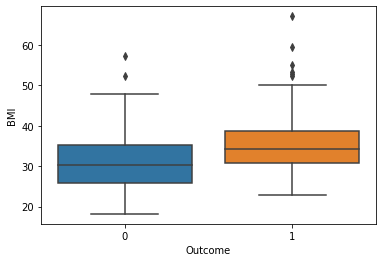

In [31]:
sns.boxplot(x='Outcome', y ='BMI', data=df)

As expected, higher the BMI, more is the risk of diabetes

**DiabetesPedigreeFunction**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

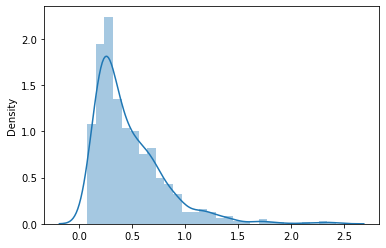

In [32]:
sns.distplot(df['DiabetesPedigreeFunction'].values)

In [33]:
df.groupby('Outcome')['DiabetesPedigreeFunction'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
1,268.0,0.550500,0.372354,0.088,0.26250,0.449,0.72800,2.420


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

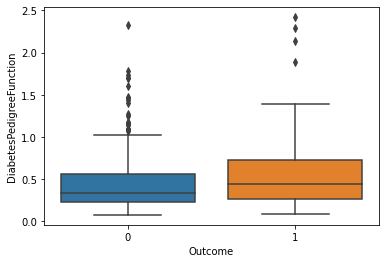

In [34]:
sns.boxplot(x='Outcome', y ='DiabetesPedigreeFunction', data=df)

Graph clearly indicates that diabetic people tend to have higher value of DiabetesPedigreeFunction

**Age**

/Users/kman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

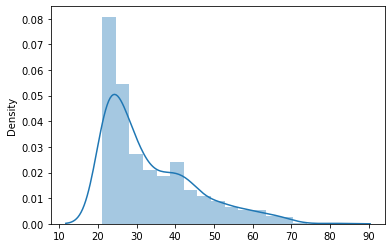

In [35]:
sns.distplot(df['Age'].values)

In [36]:
df.groupby('Outcome')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

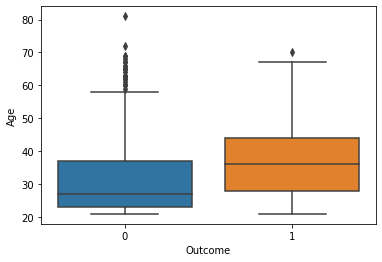

In [37]:
sns.boxplot(x='Outcome', y ='Age', data=df)

Text(0, 0.5, 'Count')

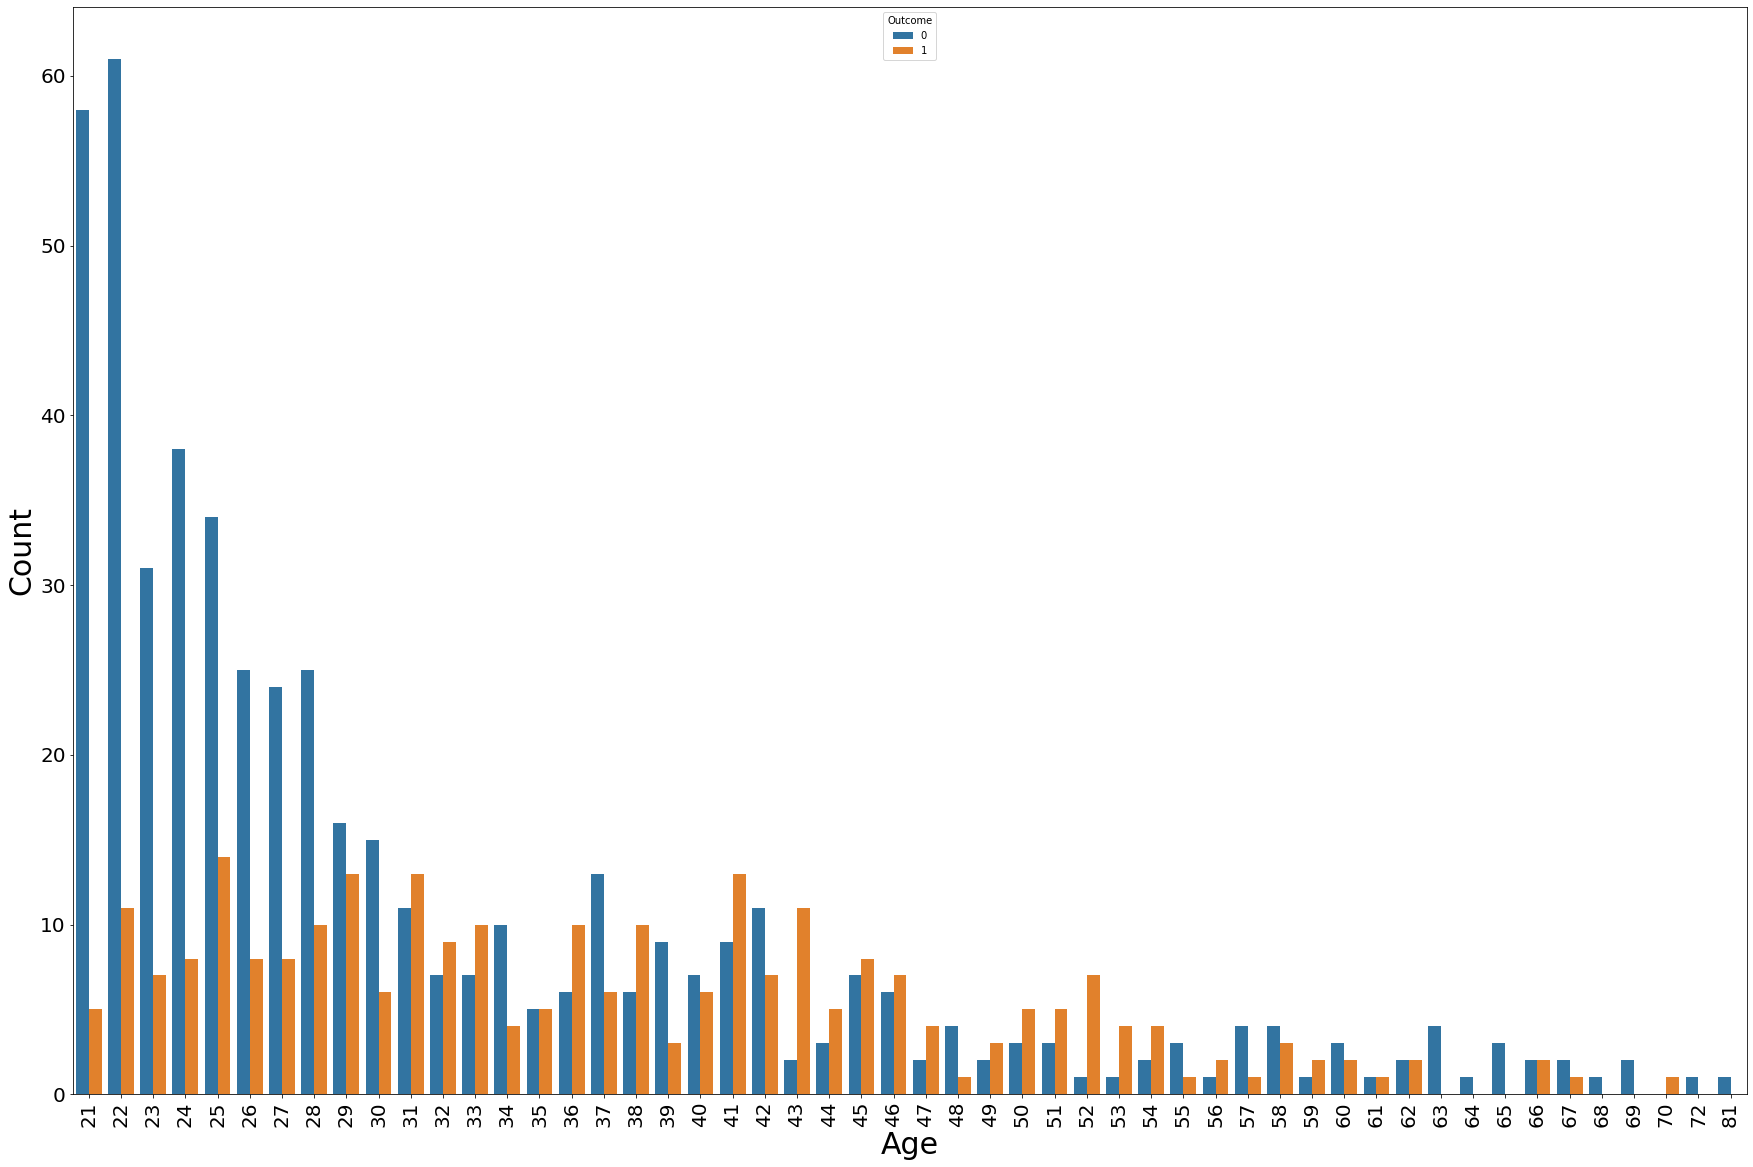

In [38]:
df['count'] = [1]*len(df)
age_count = df.groupby(['Age','Outcome'])['count'].agg('count').reset_index()
df = df.drop('count', axis = 1)
plt.figure(figsize = (30, 20))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(x='Age',y='count',hue = 'Outcome', data=age_count)
plt.xlabel('Age', fontsize = 30)
plt.ylabel('Count', fontsize = 30)

Age has a strong explainability for diabetes

Let us start preparing the data for training the model.

In [39]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Now let us split the dataset into train set and test set.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)

Since we have all the features as Numerical features, we will scale them using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.84147177, -1.3423455 ,  0.13502606, ...,  2.00364537,
         1.76747258, -0.09647146],
       [-1.13433446,  2.23023654,  2.67376148, ...,  0.23416388,
        -0.13482717,  0.69110024],
       [-0.84147177,  0.21238928,  1.31976925, ...,  0.55856882,
         1.65523402,  0.34106837],
       ...,
       [ 0.03711628,  2.06483922,  0.47352411, ...,  0.63229722,
        -0.62695011, -0.18397942],
       [-0.84147177,  1.03937586,  0.81202217, ...,  1.16314166,
         0.59040662, -0.88404315],
       [-1.13433446, -0.44919999, -0.37272103, ..., -0.79803366,
         0.87819781, -0.09647146]])

Let us convert it back into pandas so as to visualize clearly.

In [44]:
X_train = pd.DataFrame(X_train, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.841472,-1.342346,0.135026,1.285513,-1.121547,2.003645,1.767473,-0.096471
1,-1.134334,2.230237,2.673761,-0.504879,-0.002732,0.234164,-0.134827,0.691100
2,-0.841472,0.212389,1.319769,1.061714,-0.519839,0.558569,1.655234,0.341068
3,-1.134334,-0.283803,0.642773,-1.511975,-0.002732,-0.252444,1.128576,-1.059059
4,-1.134334,0.774740,0.000066,-0.040114,-0.002732,1.693986,0.426366,-0.183979


So the features are scaled now. We will now scale the test features too.

In [45]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.208567,2.494872,0.135026,-0.040114,-0.002732,-1.004473,2.040874,0.516084
1,1.208567,0.377787,-0.034223,-0.040114,-0.002732,0.027724,-0.609683,0.516084
2,-1.134334,-0.482279,0.304275,-0.040114,-0.002732,1.856189,0.587529,-0.796535
3,-0.255746,1.370170,-0.203472,-1.288176,-0.576604,-0.163969,-0.615438,-0.446503
4,-1.134334,2.197157,0.812022,-1.735774,0.331633,-0.104987,0.576017,-0.971551


## Data Modeling

**Training with default parameters**

In [46]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [47]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluating the Results

In [48]:
print('Train accuracy score- ', accuracy_score(y_train, y_train_pred))
print()
print('Train F1 score- ', f1_score(y_train, y_train_pred))
print()
print('Train Classification Report-')
print(classification_report(y_train, y_train_pred))
print()
print('Train Confusion Matrix-')
print(confusion_matrix(y_train, y_train_pred))

Train accuracy score-  0.7777777777777778

Train F1 score-  0.7023255813953488

Train Classification Report-
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       375
           1       0.66      0.75      0.70       201

    accuracy                           0.78       576
   macro avg       0.76      0.77      0.76       576
weighted avg       0.79      0.78      0.78       576


Train Confusion Matrix-
[[297  78]
 [ 50 151]]


In [49]:
print('Test accuracy score- ', accuracy_score(y_test, y_test_pred))
print()
print('Test F1 score- ', f1_score(y_test, y_test_pred))
print()
print('Test Classification Report-')
print(classification_report(y_test, y_test_pred))
print()
print('Test Confusion Matrix-')
print(confusion_matrix(y_test, y_test_pred))

Test accuracy score-  0.7760416666666666

Test F1 score-  0.6906474820143884

Test Classification Report-
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       125
           1       0.67      0.72      0.69        67

    accuracy                           0.78       192
   macro avg       0.75      0.76      0.76       192
weighted avg       0.78      0.78      0.78       192


Test Confusion Matrix-
[[101  24]
 [ 19  48]]


**Feature Importance**

In [50]:
coefs = lr.coef_[0]
features = df.columns[:-1]

coefs_df = pd.DataFrame({'features': features, 'importance': coefs})
coefs_df['importance'] = coefs_df['importance'].apply(lambda x: np.abs(x))
coefs_df.sort_values(by = 'importance', ascending = False, inplace = True)

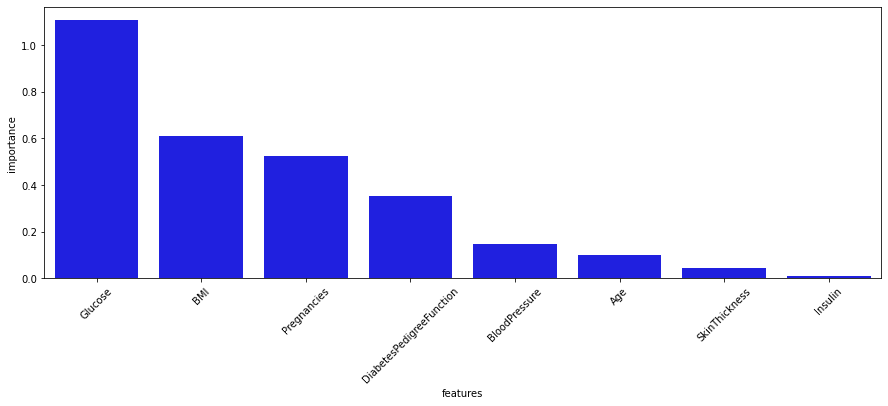

In [51]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = '45')
fig = sns.barplot(x='features',y='importance', data=coefs_df, color = 'blue')

# Deployment

We can create a function that receives the features as the input and returns the predicted class and probability as the output.

We will use the scalers and model fit before. These transformers and estimator can be dumped as a pickle file. This pickled file can be loaded anytime and used to generate prediction.

In [52]:
def predict_diabetes(data, scaler, model):
    """
    The function received a list of features for which the prediction and its prediction
    probability has to be generated.
    The function also required fit StandardScaler object and a fit machine learning model
    object to generate the predictions
  
    Parameters:
    data (list):  list of features for which you want to generate prediction
    scaler (obj): sklearn object that contains the fit standard scaler
    model (obj):  sklearn object that contains the fit machine learning model
  
    Returns:
    y_pred (int):      predicted label
    y_pred_prob (float): probability that the input features belongs to positive class
    """
    scaled_data = scaler.transform(data)
    print('scaled data- ', scaled_data)
    y_pred = model.predict(data.reshape(1,-1))
    y_pred_prob = model.predict_proba(data.reshape(1,-1))
    return y_pred[0], y_pred_prob[0][1]

In [53]:
sample_x = df.drop('Outcome',axis = 1).sample(1).values
sample_x

array([[  1.        , 138.        ,  82.        ,  29.15341959,
        155.54822335,  40.1       ,   0.236     ,  28.        ]])

In [54]:
y_pred, y_pred_prob = predict_diabetes(sample_x, scaler, lr)

scaled data-  [[-0.84147177  0.54318391  0.81202217 -0.0401137  -0.00273179  1.08941327
  -0.70753164 -0.44650332]]


In [55]:
y_pred

1

In [56]:
y_pred_prob

1.0

## Now let us answer the questions we had

### 1. Do people with high Glucose level are more vulnerable to diabetes??


From the feature importance graph, we observed that the glucose levels is the most important feature that explains the diabetes. Also from the box plot and statistical measures, we inferred that distinct difference in glucose levels between those who had diabetes and those who did not.

Thus high glucose level in body indicates more vulnerability to diabetes.

### 2. There is a general notion that overweight people are at high risk of diabetes. Is it true?

From the feature importance graph, we observed that the BMI is the second most important feature that explains the diabetes. Also from the box plot and statistical measures, we infer that people with diabetes tend to be having high BMI.

Thus it is true that overweight people are at high risk of diabetes.

### 3. Are elder people more prone to diabetes?

From the feature importance, statistical measures, bar and box plots, we can conclude that elderly people are more prone to diabetes, except for very few exceptions

### 4. Is diabetes generally hereditary? 

From the feature importance graph, we observed that the DiabetesPedigreeFunction is the fourth most important feature that explains the diabetes. Also from the box plot and statistical measures, we infer that people with diabetes tend to be having high DiabetesPedigreeFunction.

Since DiabetesPedigreeFunction directly translates to hereidity, we can conclude that people whose ancestors are having the history of diabetes, are at high risk to diabetes themselves.

### 5. Does the number of pregnancies experienced increase the risk of getting diabetes?

From the feature importance and box plots, we can conclude that more the number pregnancies experienced by the person, more is the risk of getting diabetes